In [85]:
INPUTFILE = 'input9.txt'

with open(INPUTFILE, 'r') as file:
    input = file.read()
lines = input.split("\n")

In [86]:
coord: list[tuple] = []
for line in lines:
    coord.append(tuple(list(map(int,line.split(",")))))
    
x_data = []
y_data = []

for co in coord:
    x_data.append(co[0])
    y_data.append(co[1])

In [87]:
largest = 0
rec_coord: tuple[tuple, tuple] = tuple([])
rec_sizes = []
for i in range(len(coord)):
    for j in range(i+1, len(coord)):
        size = (abs(coord[i][0] - coord[j][0]) + 1) * (abs(coord[i][1] - coord[j][1]) + 1)
        rec_sizes.append((coord[i], coord[j], size))
        if size > largest:
            largest = size
            rec_coord = (coord[i], coord[j])
print(largest)

4763932976


In [88]:
sorted_rec = sorted(rec_sizes, key=lambda x: x[2], reverse=True)

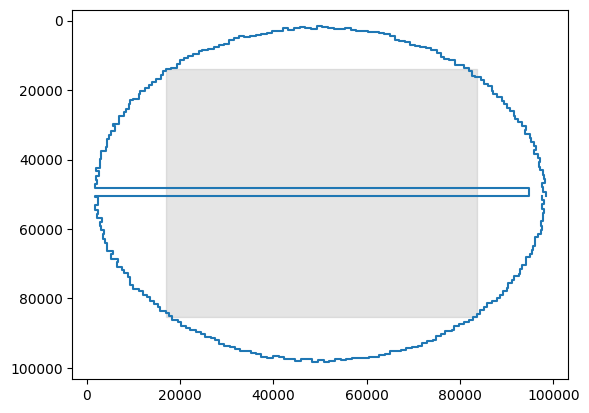

In [89]:
from matplotlib import pyplot as plt

plt.plot(x_data, y_data)
plt.fill_between([rec_coord[0][0], rec_coord[1][0]], rec_coord[0][1], rec_coord[1][1], color="gray", alpha=0.2, label="±1 pKa unit")
plt.gca().invert_yaxis()

Part 2

In [90]:
def point_in_polygon(point:tuple) -> bool:
    is_in = False
    for i in range(len(coord)):
        start = coord[i]
        end = coord[i+1] if i+1 < len(coord) else coord[0]
        if start[1] == end[1] == point[1]:
            if min(start[0], end[0]) <= point[0] <= max(start[0], end[0]):
                return True
        if min(start[1], end[1]) <= point[1] <= max(start[1], end[1]):
            left_edge = min(start[0], end[0])
            if point[0] == left_edge:
                return True
            elif point[0] > left_edge:
                is_in = not is_in
    return is_in

In [91]:
def get_all_corners(point1: tuple, point2: tuple):
    return [
        point1,
        (point1[0], point2[1]),
        point2,
        (point2[0], point1[1])
    ]

largest_rec_in: tuple[tuple, tuple, int] = tuple([])
for rec in sorted_rec:
    if all([point_in_polygon(x) for x in get_all_corners(rec[0], rec[1])]):
        largest_rec_in = rec
        break
print(largest_rec_in)

((18315, 86176), (81879, 13600), 4613357005)


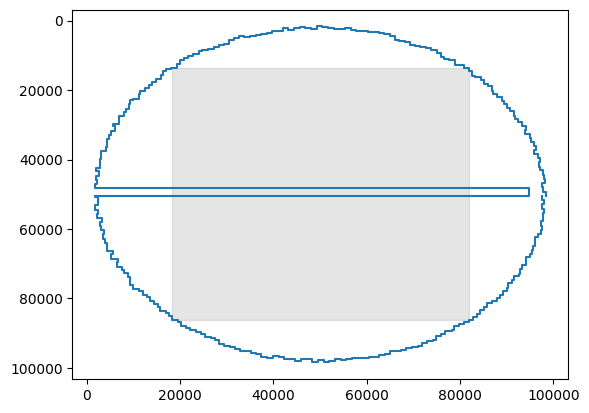

In [92]:
from matplotlib import pyplot as plt

plt.plot(x_data, y_data)
plt.fill_between([largest_rec_in[0][0], largest_rec_in[1][0]], largest_rec_in[0][1], largest_rec_in[1][1], color="gray", alpha=0.2, label="±1 pKa unit")
plt.gca().invert_yaxis()